This file is aimed to create a plot redshift range of emission lines in 3 CSST/grism band.
The figure is created by using files of redshift range for each emission line data.

In [1]:
import numpy as np
import math
from matplotlib import scale as mscale
from matplotlib import transforms as mtransforms
from matplotlib import cm
from matplotlib.ticker import MultipleLocator,FormatStrFormatter
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import os
import pandas as pd
import glob
import re
from scipy.interpolate import interp1d
ax=plt.gca()

In [2]:
"""
Functions for humanly sorting the filenames by dividing strings and numbers in the file names.
"""
def tryint(s):
    try:
        return int(s)
    except ValueError:
        return s

def str2int(v_str):
    return [tryint(sub_str) for sub_str in re.split('([0-9]+)', v_str)]

def sort_humanly(v_list):
    return sorted(v_list, key=str2int)

"""
Functions of customizing x scale in log(1+x) form.
"""
def forward(a):
    return np.log(1+a)

def inverse(a):
    return np.exp(a)-1


Emission lines data collected from https://www.stsci.edu/~strolger/docs/UNITS.txt, 
choose emission lines by deleting '#' for which you want to show in the figure.

In [3]:
emissionline = {
r'Ly$\alpha$ ,1216 $\AA$'         :1215.67,
#'OV], 1218 $\AA$'          :1218,
#'NV, 1239 $\AA$'         :1238.82,
#'NV, 1243 $\AA$'         :1242.80,
'SiII, 1260 $\AA$'       :1260.4,
#'OI, 1303 $\AA$'         :1303.5,
'CII, 1335 $\AA$'         :1334.5,
#'CII, 1336 $\AA$'         :1335.7,
#'OI, 1356 $\AA$'         :1355.6,
#'OI, 1358 $\AA$'         :1358.5,
#'SiIV, 1394 $\AA$'       :1393.76,
#'SiIV, 1403 $\AA$'       :1402.77,
#'OIV], 1393 $\AA$'        :1393.23,
#'OIV], 1400 $\AA$'        :1399.78,
#'OIV], 1401 $\AA$'        :1401.16,
#'OIV], 1405 $\AA$'        :1404.81,
#'OIV], 1407 $\AA$'        :1407.38,
#'NIV], 1488 $\AA$'         :1488,
'CIV, 1548 $\AA$'        :1548.20,
#'CIV, 1551 $\AA$'        :1550.77,
#'FeI, 1610 $\AA$'        :1610,
'HeII, 1640 $\AA$'       :1640,
#'OIII], 1661 $\AA$'       :1661,
'OIII], 1663 $\AA$'       :1663,
#'OIII], 1667 $\AA$'       :1667,
#'NIII], 1750 $\AA$'       :1750,
'SiII, 1808 $\AA$'       :1808,
#'SiII, 1817 $\AA$'       :1817,
#'SiIII], 1892 $\AA$'       :1892,
'CIII], 1909 $\AA$'       :1909,
#'NII, 2141 $\AA$'        :2141?,
#'FeII, 2200-2800 $\AA$'      :(2200-2800),
'CII], 2326 $\AA$'        :2326,
#'[NeIV], 2439 $\AA$'       :2438.6,
#'[NeIV], 2441 $\AA$'       :2441.3,
'[OII], 2470 $\AA$'        :2470.3,
#'[OII], 2471 $\AA$'        :2470.4,
#'HeII, 2512 $\AA$'       :2512,
#'MgVII, 2512 $\AA$'       :2512,
#'HeII, 2734 $\AA$'       :2734,
#'MgII, 2796 $\AA$'       :2795.528,
#'MgII, 2803 $\AA$'       :2802.705,
#'MgI, 2852 $\AA$'         :2852.1262,
#'FeI, 2868 $\AA$'        :2868,
#'OIII, 3047 $\AA$'       :3047?,
#'OIII, 3123 $\AA$'       :3123,
#'OIII, 3133 $\AA$'       :3133,
#'HeII, 3204 $\AA$'       :3204,
#'NaI, 3302 $\AA$'        :3302.37,
#'NaI, 3303 $\AA$'        :3302.98,
#'OIII. 3312 $\AA$'       :3312,
#'[NeIII], 3343 $\AA$'      :3342.9,
#'[NeV], 3346 $\AA$'        :3345.9,
#'[NeV], 3426 $\AA$'        :3425.8,
#'OIII, 3444 $\AA$'       :3444,    
#'[OII], 3726 $\AA$'        :3726.16,
'[OII], 3728 $\AA$'        :3728.91,
#'OIII, 3760 $\AA$'       :3760,
#'FeVII, 3760 $\AA$'      :3760.3,
#'H$\eta$, 3798 $\AA$'         :3797.90,
'H$\zeta$, 3836 $\AA$'          :3835.38,
'[NeIII], 3868 $\AA$'      :3868.74,
#'H\eta, 3890 $\AA$'       :3889.05,
#'HeI, 3889 $\AA$'        :3888.65,
'CaII, 3952 $\AA$'       :3952,
'[NeIII], 3968 $\AA$'      :3967.51,
#'H$\epsil$, 3970 $\AA$'      :3970.07,
#'[SII], 4069 $\AA$'        :4068.60,
#'[SII], 4076 $\AA$'        :4076.35,
'H$\delta$, 4102 $\AA$'      :4101.73,
#'[FeII], 4250 $\AA$'       :4250,
#'[FeII], 4281 $\AA$'       :4281,
'G_band, 4304 $\AA$'       :4304,
'H$\gamma$, 4341 $\AA$'      :4340.46,
'[OIII], 4364 $\AA$'       :4363.21,
#'HeI, 4772 $\AA$'        :4471.5,
#'NV, 4619 $\AA$'         :4619,
#'NIII, 4640 $\AA$'       :4640,
#'CIII, 4650 $\AA$'       :4650,
#'CIV, 4658 $\AA$'        :4658,
#'[FeIII], 4658 $\AA$'       :4658.1,
#'HeII, 4686 $\AA$'       :4685.7,
#'[ArIV], 4711 $\AA$'       :4711.33,
#'[ArIV], 4740 $\AA$'       :4740.20,
r'H$\beta$, 4862 $\AA$'       :4861.32,
'[OIII], 4959 $\AA$'      :4958.91,
'[OIII], 5007 $\AA$'      :5005.84,
#'[FeVII], 5158 $\AA$'      :5158.3,
#'[FeVIII], 5159 $\AA$'      :5159.0?,
#'Mgb, 5167 $\AA$'       :5167.32,
'Mgb, 5178 $\AA$'       :5178.68,
#'MgIb, 5184 $\AA$'       :5183.60,
#'[FeVI], 5176 $\AA$'       :5176.4?,
#'[FeVI], 5177 $\AA$'       :5177.0,
#'[ArIII], 5192 $\AA$'      :5191.82,
#'[NI], 5199 $\AA$'         :5198.5,
#'[NI], 5201 $\AA$'         :5200.7,
#'FeIE2, 5270 $\AA$'       :5270,
#'[FeVII], 5278 $\AA$'      :5277.8,
#'[FeXIV], 5303 $\AA$'       :5303.0,
#'[CaV], 5309 $\AA$'        :5309.2,
#'[FeVI], 5335 $\AA$'       :5335.2,
#'FeII, 4500-5400 $\AA$'      :(4500-5400)
#'[OI], 5577 $\AA$'         :5577.35,
#'[FeVII], 5721 $\AA$'      :5720.9,
#'[NII], 5755 $\AA$'        :5754.8,
#'CIV, 5802 $\AA$'        :5801.51,
#'CIV, 5812 $\AA$'        :5812.14,
#'HeI, 5876 $\AA$'        :5875.7,
#'NaD, 5890 $\AA$'        :5889.950,
#'NaD, 5896 $\AA$'        :5895.924,
#'[CaV], 6086 $\AA$'        :6085.9,
#'[FeVII], 6087 $\AA$'      :6086.9,
#'O2, 6259 $\AA$'         :6258,
#'O2, 6280 $\AA$'         :6280,
'[OI], 6302 $\AA$'         :6300.23,
#'[SIII], 6312 $\AA$'       :6312.1,
#'[OI], 6364 $\AA$'         :6363.88,
#'[FeX], 6375 $\AA$'         :6374.5,
#'Ca+Fe, 6495 $\AA$'        :6495,
#'[NII], 6548 $\AA$'        :6548.1,
r'H$\alpha$, 6563 $\AA$'      :6562.80,
'[NII], 6585 $\AA$'        :6583.6,
#'HeI, 6678 $\AA$'        :6678.15,
#'TiO, 6700 $\AA$'         :6700,
#'CaI, 6718 $\AA$'         :6718,
#'[SII], 6716 $\AA$'        :6716.42,
'[SII], 6730 $\AA$'        :6730.78,
#'B_Band, 6868 $\AA$'       :6868,
#'[ArV], 7006 $\AA$'         :7005.67,
#'HeI, 7065 $\AA$'        :7065.3,
#'[ArIII], 7136 $\AA$'      :7135.80,
#'[FeII], 7155 $\AA$'       :7155,
#'[CaII], 7291 $\AA$'       :7291.46,
#'[CaII], 7324 $\AA$'       :7323.88,
#'[OII], 7318 $\AA$'        :7318.6,
#'[OII], 7319 $\AA$'        :7319.4,
#'[OII], 7330 $\AA$'        :7329.9,
#'[OII], 7331 $\AA$'        :7330.7,
#'KI, 7665 $\AA$'         :7664.872,
#'KI, 7699 $\AA$'         :7698.977,
#'[ArIII], 7751 $\AA$'      :7751.06,
#'FeXI', 7892 $\AA$        :7891.9,
#'OI, 8446 $\AA$'         :8446,
#'CaII, 8498 $\AA$'       :8498.0,
#'CaII, 8542 $\AA$'       :8542.1,
#'CaII, 8662 $\AA$'       :8662.2,
#'[SIII], 9069 $\AA$'       :9069.4,
#'P9, 9229 $\AA$'          :9229.02,
#'[SIII], 9532 $\AA$'       :9532.1,
#'P$\epsil$, 9546 $\AA$'      :9545.98,
#'P$\delta$, 10049 $\AA$'      :10049.4,
#'HeI, 10830 $\AA$'        :10830,
#'P$\gamma$, 10938 $\AA$'      :10938.1,
#r'P$\beta$, 12818 $\AA$'       :12818.1,
#r'P$\alpha$, 18751 $\AA$'      :18751.0,
#Bracket-gam, 21655 $\AA$      :21655.0
}

elname = list(emissionline.keys())
lambdae = list(emissionline.values())

Read and extend the grism throughput data

In [4]:
GU = pd.read_csv('/home/rain/documents/CSST/redshift/throughput/GU.csv', sep=',')
GUX = np.linspace(GU['wavelength'].min(), GU['wavelength'].max(), 500) 
fu = interp1d(GU['wavelength'], GU['throughput'], kind ='slinear')
GUY = fu(GUX)

GV = pd.read_csv('/home/rain/documents/CSST/redshift/throughput/GV.csv', sep=',')
GVX = np.linspace(GV['wavelength'].min(), GV['wavelength'].max(), 500)
fv = interp1d(GV['wavelength'], GV['throughput'], kind ='slinear')
GVY = fv(GVX)

GI = pd.read_csv('/home/rain/documents/CSST/redshift/throughput/GI.csv', sep=',')
GIX = np.linspace(GI['wavelength'].min(), GI['wavelength'].max(), 500)
fi = interp1d(GI['wavelength'], GI['throughput'], kind ='slinear')
GIY = fi(GIX)

grism = ['GU', 'GV', 'GI']
grismx = ['GUX', 'GVX', 'GIX']
grismy = ['GUY', 'GVY', 'GIY']
colors = ['Blues', 'Greens', 'Reds']

Detect whether working directories and emission line redshift range files exist, if so, delete all the files.

In [5]:
work_dict = '/home/rain/documents/CSST/redshift/'

for i in range(len(grismx)):
    if os.path.exists(str(work_dict)+str(grismx[i])):
        print(str(work_dict)+str(grismx[i])+'/ already exsits!')
    else:
        os.mkdir(str(work_dict)+str(grismx[i]))
        print(str(work_dict)+str(grismx[i])+'/ is created!')
    filenames = sorted(glob.glob(str(work_dict)+str(grismx[i])+"/*"))
    for j in range(len(filenames)):
        if os.path.exists(filenames[j]):
            os.remove(filenames[j])

/home/rain/documents/CSST/redshift/GUX/ already exsits!
/home/rain/documents/CSST/redshift/GVX/ already exsits!
/home/rain/documents/CSST/redshift/GIX/ already exsits!


Calculate and save results of each emission lines redshifts of 3 CSST/grism band and save into files.

z = $\lambda_o$ / $\lambda_e$ -1


In [6]:
redshift = []

for i in range(len(grismx)):
    for j in range(len(lambdae)):
        redshift = []
        for k in range(len(globals()[grismx[i]])):
            #judge if lambda_o>lambda_e
            if 10*globals()[grismx[i]][k]/lambdae[j] > 1 :
                #add elements to the redshift array
                redshift.append(10*globals()[grismx[i]][k]/lambdae[j] - 1)
                #save each file in name of 'grism'+'emission line number'+'emission line name'.
                name = str(work_dict)+str(grismx[i])+'/'+str(grismx[i])+'_'+str(j)+'_emission_line_'+str(elname[j])+'.csv'
                np.savetxt(name, redshift, header = 'redshift' )
        print(str(work_dict)+str(grismx[i])+'/'+str(grismx[i])+'_'+str(j)+'_emission_line_'+str(elname[j])+' is created!')

/home/rain/documents/CSST/redshift/GUX/GUX_0_emission_line_Ly$\alpha$ ,1216 $\AA$ is created!
/home/rain/documents/CSST/redshift/GUX/GUX_1_emission_line_SiII, 1260 $\AA$ is created!
/home/rain/documents/CSST/redshift/GUX/GUX_2_emission_line_CII, 1335 $\AA$ is created!
/home/rain/documents/CSST/redshift/GUX/GUX_3_emission_line_CIV, 1548 $\AA$ is created!
/home/rain/documents/CSST/redshift/GUX/GUX_4_emission_line_HeII, 1640 $\AA$ is created!
/home/rain/documents/CSST/redshift/GUX/GUX_5_emission_line_OIII], 1663 $\AA$ is created!
/home/rain/documents/CSST/redshift/GUX/GUX_6_emission_line_SiII, 1808 $\AA$ is created!
/home/rain/documents/CSST/redshift/GUX/GUX_7_emission_line_CIII], 1909 $\AA$ is created!
/home/rain/documents/CSST/redshift/GUX/GUX_8_emission_line_CII], 2326 $\AA$ is created!
/home/rain/documents/CSST/redshift/GUX/GUX_9_emission_line_[OII], 2470 $\AA$ is created!
/home/rain/documents/CSST/redshift/GUX/GUX_10_emission_line_[OII], 3728 $\AA$ is created!
/home/rain/documents/CS

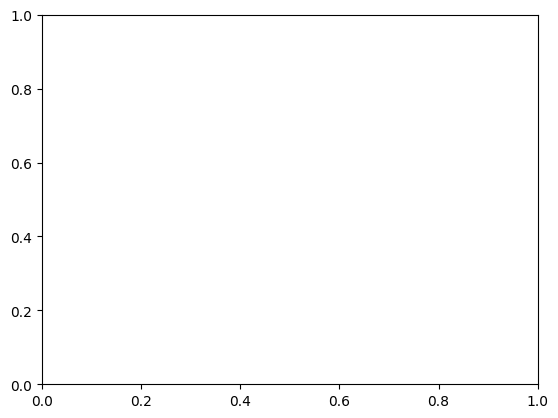

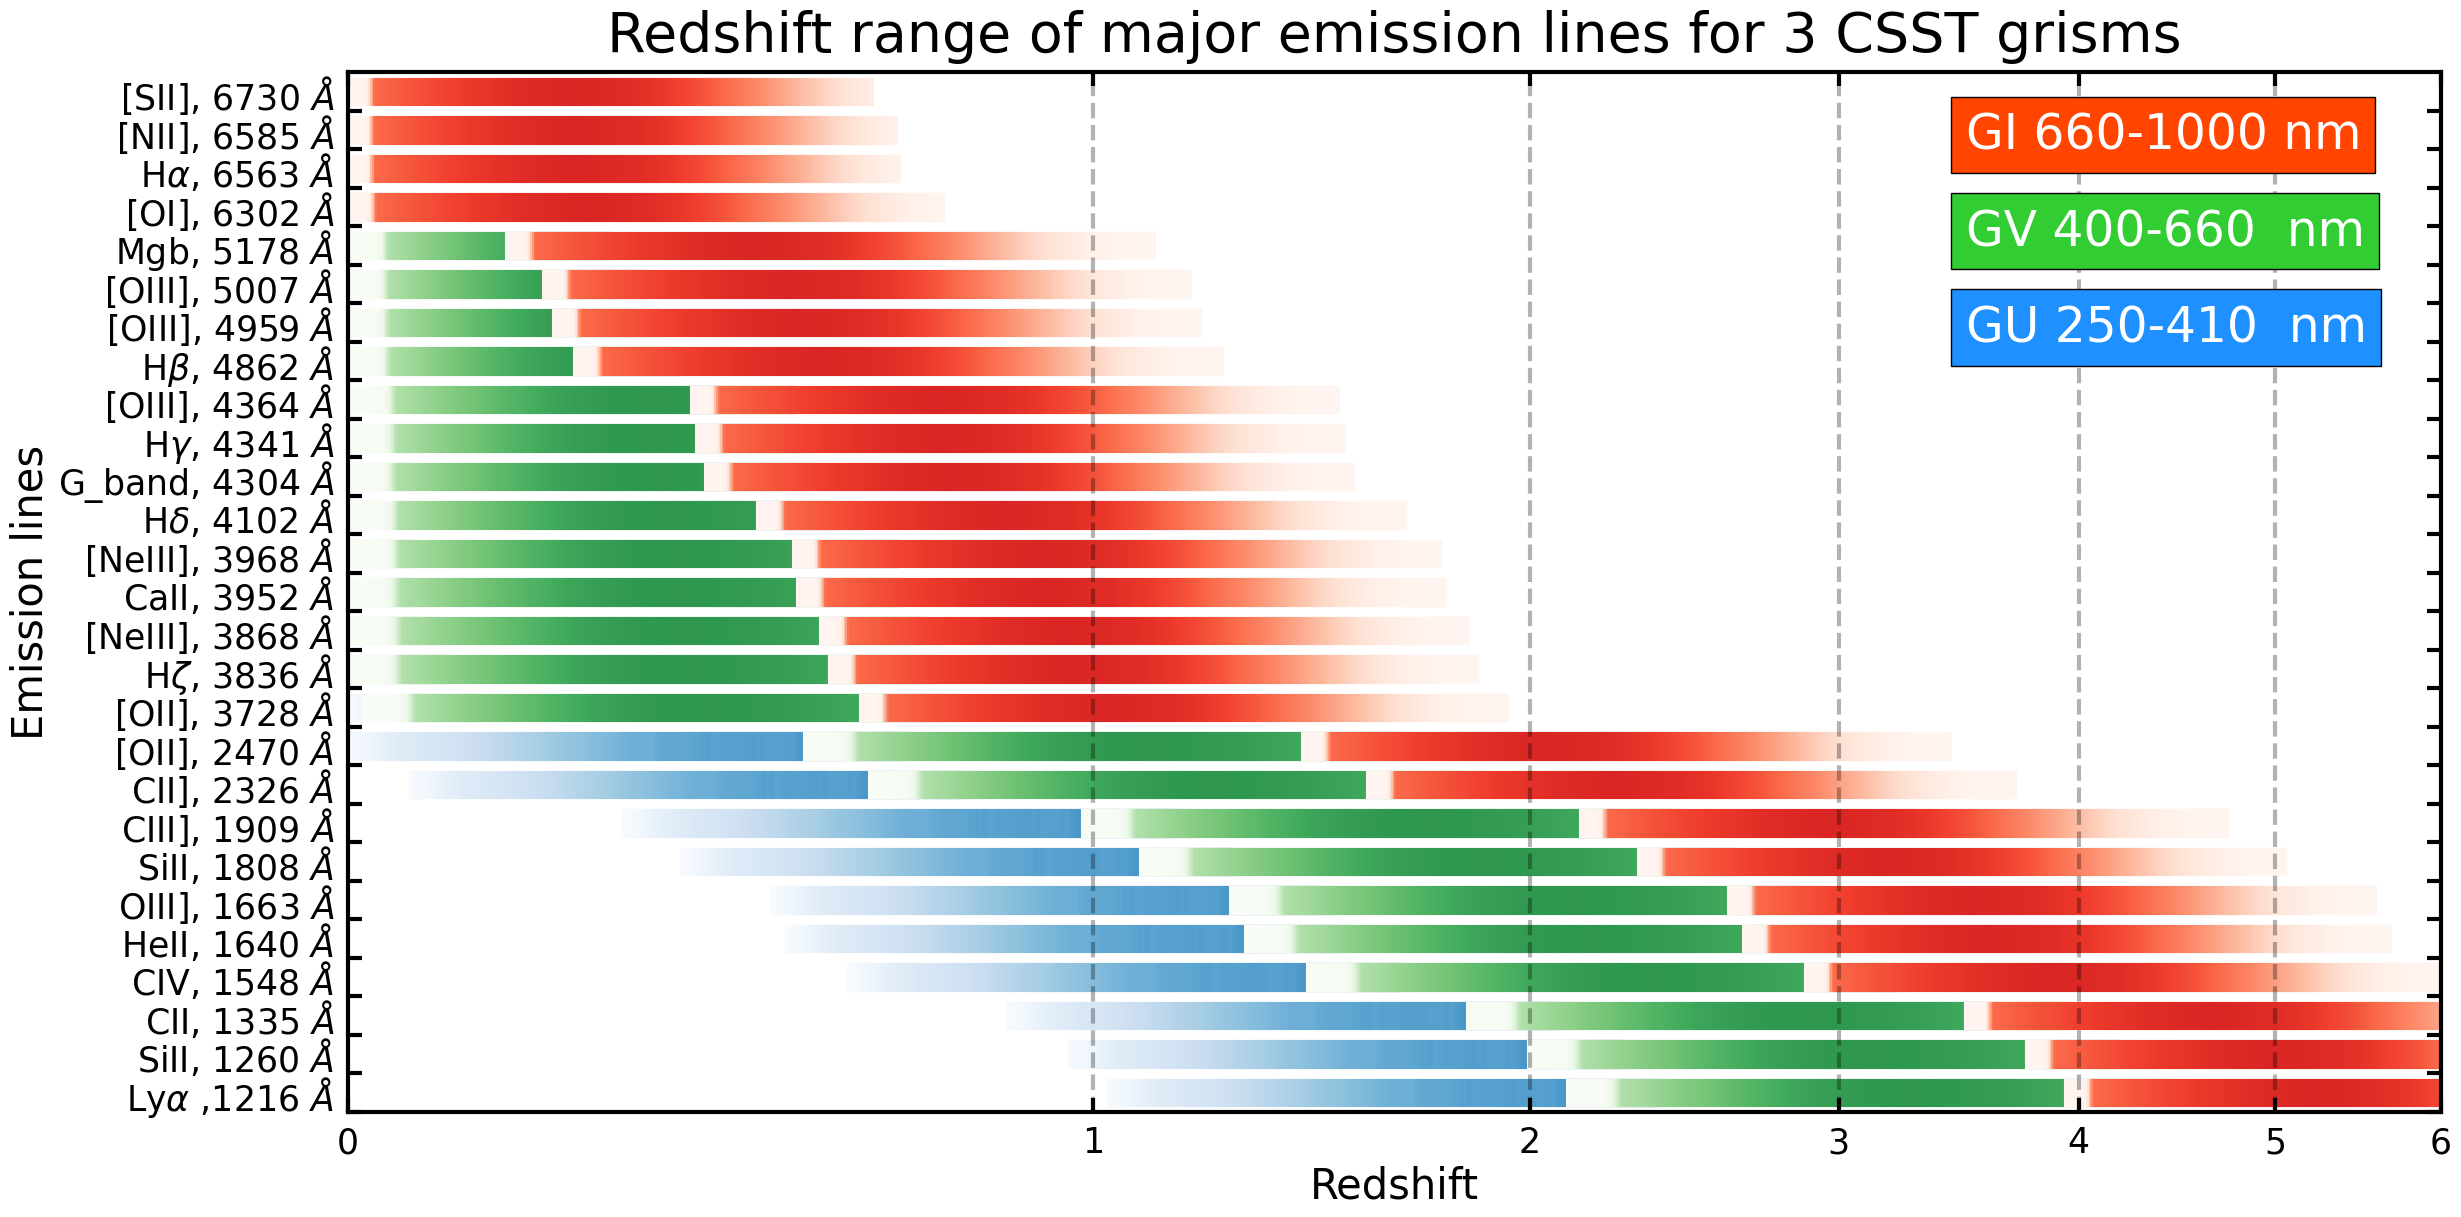

In [7]:
redshiftx=[]
fig, ax = plt.subplots(figsize=(len(elname), len(elname)/2))
yl = 1/(len(elname)+1)-0.01 

for j in range(len(grismx)):
    filenames = sorted(glob.glob("/home/rain/documents/CSST/redshift/"+str(grismx[j])+"/*"))
    filenames = sort_humanly(filenames[0:len(filenames)])
    map_vir = cm.get_cmap(name=colors[j])
    #get the throughput data to determine the colormap.
    z1 = globals()[grismy[j]]
    #normalize the throughput data into (0,1) and change the max value of color
    norm = plt.Normalize(min(z1),max(z1))
    norm_values = 0.7*norm(z1)
    colors1 = map_vir(norm_values)

    for i in range(len(filenames)):
        redshiftx=[]
        redshiftx = np.loadtxt(fname=filenames[i],usecols=(0))
        y = i/(len(elname))+0.005
        for k in range(len(redshiftx)):
            ax.axvline(redshiftx[k], y, y+yl, color=colors1[k], zorder=1)

ax.spines['bottom'].set_linewidth(3)
ax.spines['left'].set_linewidth(3)
ax.spines['right'].set_linewidth(3)
ax.spines['top'].set_linewidth(3)
ax.tick_params(which='major',direction='in', length=10, width=3, top=True, right=True, zorder = 2, pad = 10)
ax.tick_params(which='minor',direction='in', right=False, left=False, zorder = 2, pad = 10)
ax.tick_params(labelsize=25)
for v in range(1,6):
        ax.axvline(v, linestyle='--',alpha=0.3, color = 'k' ,linewidth=3)
ax.set_xlim(0,6)
ax.set_ylim(0,len(elname))
ax.set_xscale('function', functions = (forward, inverse))
yticks = []
for p in range(len(elname)):
        yticks.append(p+0.5)
ax.set_yticks(yticks, minor = True)
ax.set_yticklabels(elname, minor = True, fontsize=25)
y_label = np.arange(len(elname))
plt.yticks(color='w')
ax.yaxis.set_major_locator(ticker.FixedLocator(y_label))
ax.yaxis.set_minor_locator(ticker.FixedLocator(yticks))
ax.set_xlabel('Redshift',fontsize=30)
ax.set_ylabel('Emission lines',fontsize=30)
plt.title('Redshift range of major emission lines for 3 CSST grisms',fontsize=40,pad=15)
ax.text(3.5, len(elname)-(2+2*2.5), 'GU 250-410  nm', style='normal', color='white', fontsize = 35,
        bbox={'facecolor': 'dodgerblue', 'pad': 10})
ax.text(3.5, len(elname)-(2+1*2.5), 'GV 400-660  nm', style='normal', color='white', fontsize = 35,
        bbox={'facecolor': 'limegreen',  'pad': 10})
ax.text(3.5, len(elname)-(2+0*2.5), 'GI 660-1000 nm', style='normal', color='white', fontsize = 35,
        bbox={'facecolor': 'orangered',  'pad': 10})
plt.savefig('/home/rain/documents/CSST/redshift/zcoverage.pdf')
plt.show()